<a href="https://colab.research.google.com/github/shubhamrai1318/MachineLearningProjects/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Recognition using RANDOM FOREST**

### **Importing Basic Library**

In [1]:
import pandas as pd
import numpy as np

### **Mounting the drive and Load Dataset**


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
fileName = "/content/gdrive/MyDrive/Data CsvFile/digit.csv"
dataset = pd.read_csv(fileName)

### **Summarize Dataset**

In [7]:
print(dataset.shape)
print(dataset.sample(5))

(2290, 785)
      label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
56        2       0       0       0       0       0       0       0       0   
1944      9       0       0       0       0       0       0       0       0   
1622      4       0       0       0       0       0       0       0       0   
439       9       0       0       0       0       0       0       0       0   
1222      0       0       0       0       0       0       0       0       0   

      pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
56         0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1944       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1622       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
439        0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1222       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

      pixel780  pixel781  

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Columns: 785 entries, label to pixel783
dtypes: float64(215), int64(570)
memory usage: 13.7 MB


### **Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)**

In [9]:
X = dataset.iloc[:,1:]
print(X)
print(X.shape)


      pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          0       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0       0       0       0   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
2285       0       0       0       0       0       0       0       0       0   
2286       0       0       0       0       0       0       0       0       0   
2287       0       0       0       0       0       0       0       0       0   
2288       0       0       0       0       0       0       0       0       0   
2289       0       0       0       0       0       0       0       0       0   

      pixel9  ...  pixel774  pixel775  

In [10]:
Y = dataset.iloc[:,0]
print(Y)
print(Y.shape)

0       1
1       0
2       1
3       4
4       0
       ..
2285    1
2286    0
2287    2
2288    2
2289    7
Name: label, Length: 2290, dtype: int64
(2290,)


### **ML Implementation**

In [16]:
# Splitting Dataset into Test & Train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [17]:
# Filling the null values
X_test = X_test.fillna(X_test.mean())

In [18]:
# Training
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [19]:
# Model Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 90.22687609075044%


Predicted 4


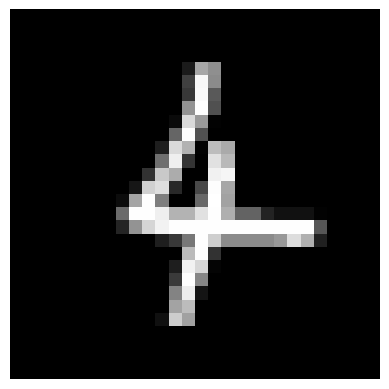

In [20]:
import matplotlib.pyplot as plt
index=10
print("Predicted " + str(model.predict(X_test)[index]))
plt.axis('off')
plt.imshow(X_test.iloc[index].values.reshape((28,28)),cmap='gray')